In [364]:
import streamlit as st
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pickle
from datetime import datetime

path=r"C:\Users\praya\Documents\Project EIL\AL1111.csv"
data=pd.read_csv(path,parse_dates=[0],infer_datetime_format= True, dayfirst=True,)

In [365]:
data

,VENDOR_CODE,DELIVERY_PERIOD,DP_TYPE,ACT_ISS_DT,ITEM,ORDER_QTY,UOM,UNIT_PRICE
0,E009,0,Years,03-05-00,ITEM2,48,NOS,142.0
1,T040,0,Years,21-08-01,ITEM2,1194,NOS,80.0
2,D111,0,Years,20-11-01,ITEM2,876,NOS,77.0
3,F130,0,Years,11-04-02,ITEM2,2543,NOS,70.0
4,T040,0,Years,29-05-02,ITEM2,2888,NOS,69.0
...,...,...,...,...,...,...,...,...
2109,C209,6,Weeks,17-08-21,ITEM5,12,NOS,1.0
2110,E009,2,Months,NaN,ITEM5,1,NOS,1.0
2111,T040A,6,Weeks,NaN,ITEM5,33,NOS,275.0
2112,T040,0,Years,NaN,ITEM5,269,NOS,170.0


In [366]:
data = data[(data[['ORDER_QTY','DELIVERY_PERIOD']] != 0).all(axis=1)]

In [367]:
data.dropna(subset=["ACT_ISS_DT"],inplace=True)

C:\Users\praya\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [368]:
data['ACT_ISS_DT'] = pd.to_datetime(data['ACT_ISS_DT'], format='%d-%m-%y')

C:\Users\praya\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [369]:
data=data.sort_values(by='ACT_ISS_DT')

In [370]:
data.reset_index(inplace=True)
data.drop(['index'],inplace=True,axis=1)
data.drop(['UOM'],inplace=True,axis=1)

In [371]:
data['TOTAL PRICE']=data['ORDER_QTY']*data['UNIT_PRICE']

In [372]:
data['ACT_ISS_DT_YR'] = data['ACT_ISS_DT'].dt.year
data['ACT_ISS_DT_M'] = data['ACT_ISS_DT'].dt.month
data['ACT_ISS_DT_D'] = data['ACT_ISS_DT'].dt.day

In [373]:
#function to set all the Delivery period to days
def DP(dataframe,column,column2,new_column_name):
    n=dataframe[column].count()
    j=[]
    for i in range(0,n):
        if dataframe[column2][i] == "Weeks":
            j.append(dataframe[column][i]*7)
        elif dataframe[column2][i] =="Months":
            j.append(dataframe[column][i]*30)
        else:
            j.append(dataframe[column][i])
    dataframe.insert(9,new_column_name,j)

In [374]:
DP(data,'DELIVERY_PERIOD','DP_TYPE','Delivery_Period(Days)')

In [375]:
data.drop(['DELIVERY_PERIOD'],inplace=True,axis=1)
data.drop(['DP_TYPE'],inplace=True,axis=1)

In [376]:
data

,VENDOR_CODE,ACT_ISS_DT,ITEM,ORDER_QTY,UNIT_PRICE,TOTAL PRICE,ACT_ISS_DT_YR,Delivery_Period(Days),ACT_ISS_DT_M,ACT_ISS_DT_D
0,T040,2003-01-11,ITEM3,2,650.0,1300.0,2003,56,1,11
1,T050,2003-03-06,ITEM2,693,80.0,55440.0,2003,90,3,6
2,D111,2003-03-06,ITEM3,381,537.0,204597.0,2003,90,3,6
3,D111,2003-03-06,ITEM1,148,214.0,31672.0,2003,90,3,6
4,D111,2003-03-06,ITEM4,197,120.0,23640.0,2003,90,3,6
...,...,...,...,...,...,...,...,...,...,...
2019,S265,2021-07-17,ITEM5,3,475.0,1425.0,2021,42,7,17
2020,C209,2021-08-17,ITEM2,181,1.0,181.0,2021,42,8,17
2021,C209,2021-08-17,ITEM1,34,1.0,34.0,2021,42,8,17
2022,C209,2021-08-17,ITEM4,54,1.0,54.0,2021,42,8,17


In [377]:
data['VENDOR_CODE'].value_counts().nlargest(1)

T040    475
Name: VENDOR_CODE, dtype: int64

In [378]:
max=data['TOTAL PRICE'].idxmax()

In [379]:
data[1799:1800]

,VENDOR_CODE,ACT_ISS_DT,ITEM,ORDER_QTY,UNIT_PRICE,TOTAL PRICE,ACT_ISS_DT_YR,Delivery_Period(Days),ACT_ISS_DT_M,ACT_ISS_DT_D
1799,T226,2018-07-06,ITEM3,5770,1225.0,7068250.0,2018,150,7,6


In [380]:
min=data['TOTAL PRICE'].idxmin()

In [381]:
data[559:560]

,VENDOR_CODE,ACT_ISS_DT,ITEM,ORDER_QTY,UNIT_PRICE,TOTAL PRICE,ACT_ISS_DT_YR,Delivery_Period(Days),ACT_ISS_DT_M,ACT_ISS_DT_D
559,M057,2009-03-26,ITEM3,15,0.0,0.0,2009,42,3,26


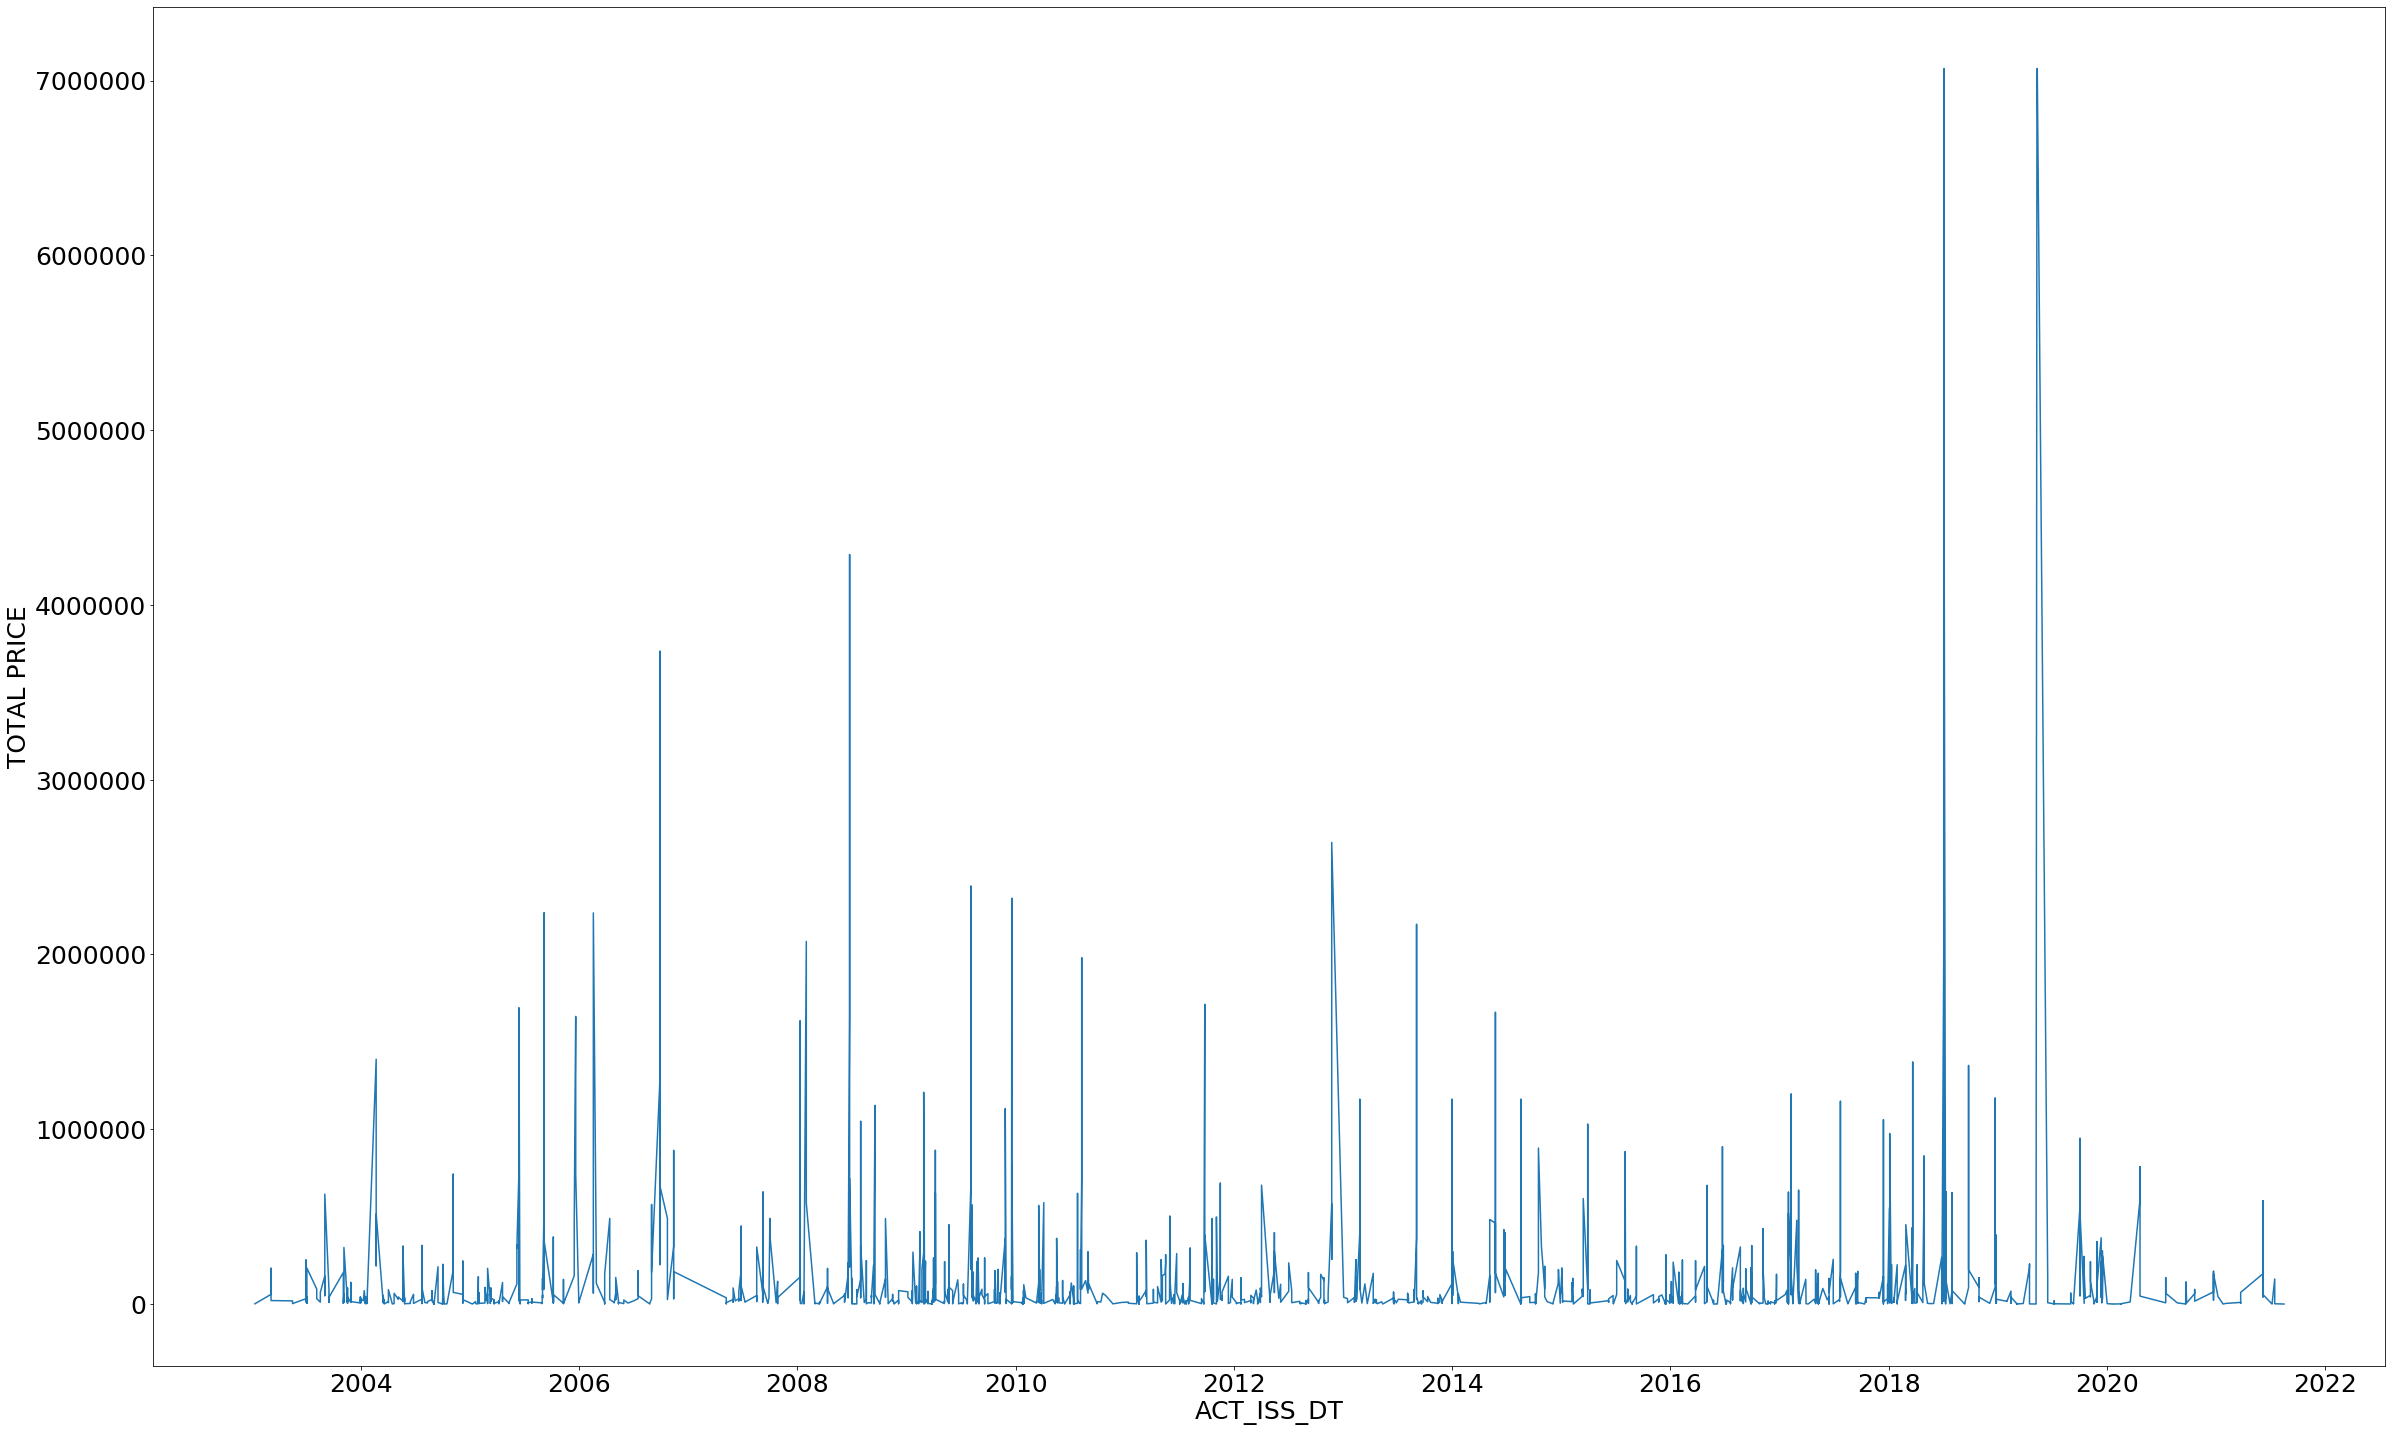

In [382]:
plt.rcParams.update({'font.size': 25})
plt.figure(figsize=(40,25))
plt.ylabel("TOTAL PRICE")
plt.xlabel("ACT_ISS_DT")
plt.plot(data['ACT_ISS_DT'],data['TOTAL PRICE'])

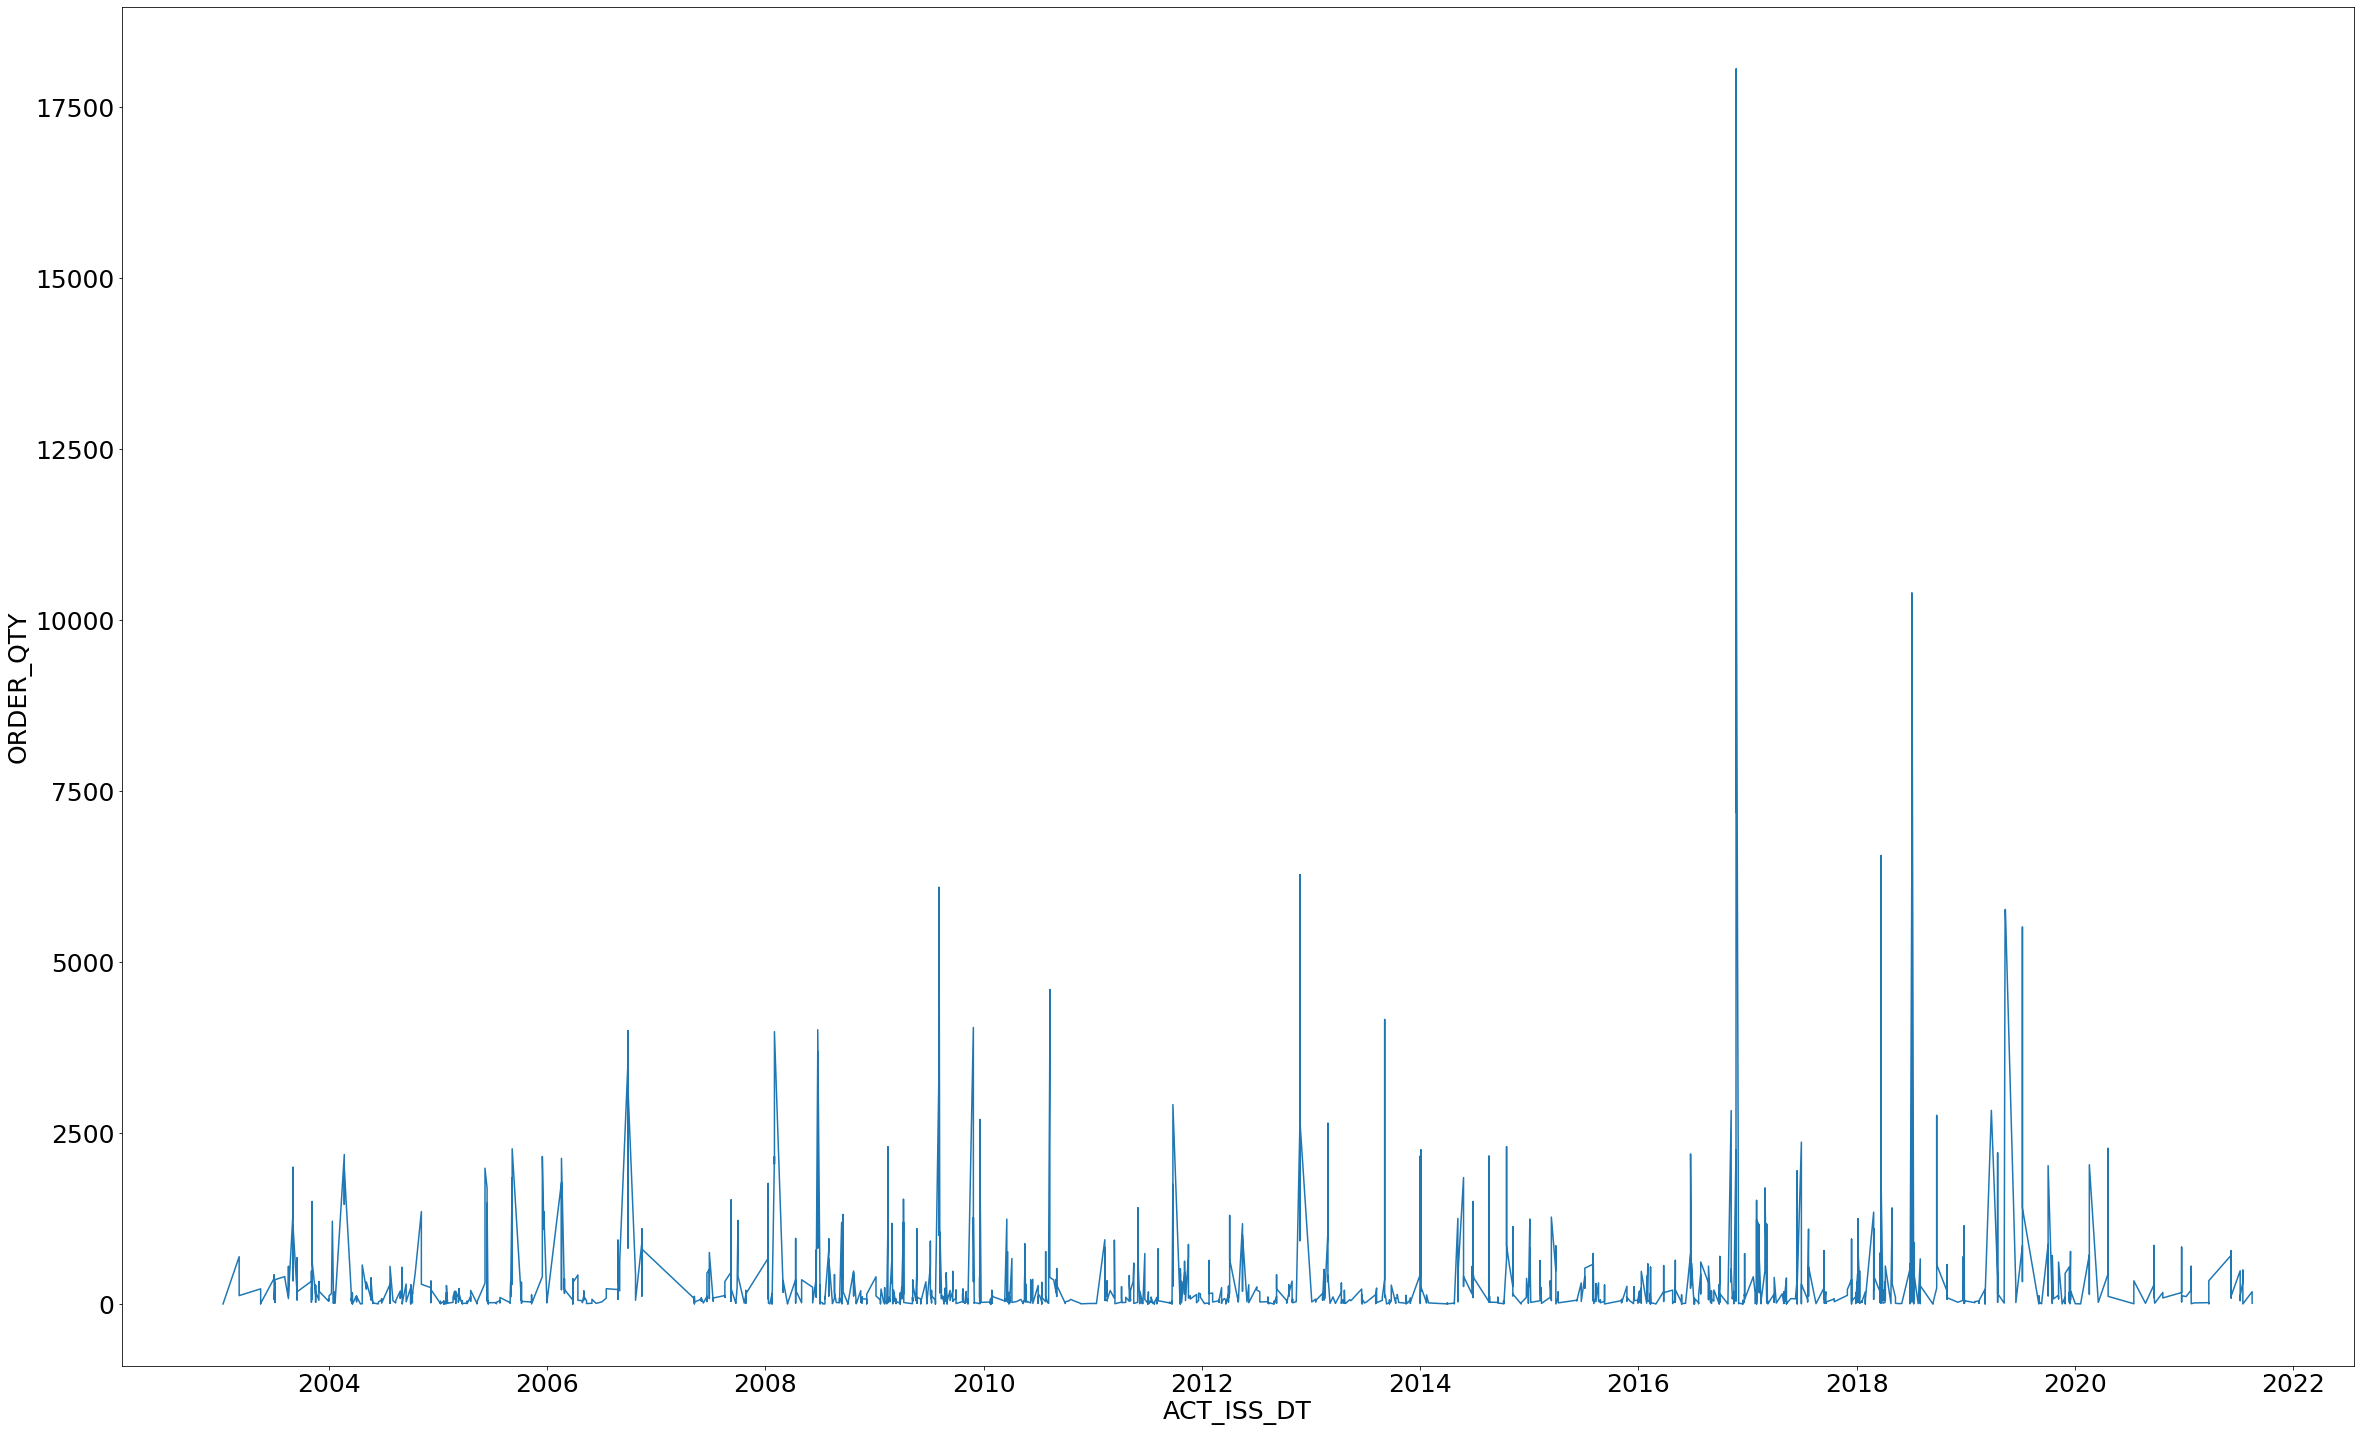

In [383]:
plt.rcParams.update({'font.size': 25})
plt.figure(figsize=(40,25))
plt.ylabel("ORDER_QTY")
plt.xlabel("ACT_ISS_DT")
plt.plot(data['ACT_ISS_DT'],data['ORDER_QTY'])

Applying Machine Learning Algorithm

In [384]:
#separate the other attributes from the predicting attribute
x = data.drop('UNIT_PRICE',axis=1)
#separte the predicting attribute into Y for model training 
y = data['UNIT_PRICE']

In [385]:
# handle categorical variable
items=pd.get_dummies(x,drop_first=True)
# dropping extra column
x= x.drop('ITEM',axis=1)
# concatation of independent variables and new cateorical variable.
x=pd.concat([x,items],axis=1)

In [386]:
x=x.drop('VENDOR_CODE',axis=1)

In [387]:
x = x.loc[:,~x.columns.duplicated()]

In [388]:
x=x.drop('TOTAL PRICE',axis=1)

In [389]:
x=x.drop('ACT_ISS_DT',axis=1)

In [390]:
x

,ORDER_QTY,ACT_ISS_DT_YR,Delivery_Period(Days),ACT_ISS_DT_M,ACT_ISS_DT_D,VENDOR_CODE_3637,VENDOR_CODE_3747,VENDOR_CODE_3806,VENDOR_CODE_80290,VENDOR_CODE_80293,...,VENDOR_CODE_W615,VENDOR_CODE_Y634,VENDOR_CODE_~0985,VENDOR_CODE_~0991,VENDOR_CODE_~1228,VENDOR_CODE_~5121,ITEM_ITEM2,ITEM_ITEM3,ITEM_ITEM4,ITEM_ITEM5
0,2,2003,56,1,11,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,693,2003,90,3,6,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,381,2003,90,3,6,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,148,2003,90,3,6,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,197,2003,90,3,6,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019,3,2021,42,7,17,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2020,181,2021,42,8,17,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2021,34,2021,42,8,17,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2022,54,2021,42,8,17,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [391]:
# importing train_test_split from sklearn
from sklearn.model_selection import train_test_split
# splitting the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [392]:
x_train.shape  , y_train.shape

((1619, 56), (1619,))

In [393]:
x_test.shape  , y_test.shape

((405, 56), (405,))

In [394]:
# importing module
from sklearn.linear_model import LinearRegression
# creating an object of LinearRegression class
LR = LinearRegression()
# fitting the training data
LR.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [395]:
y_prediction =  LR.predict(x_test)
y_prediction

array([ 487.76241247,  353.71543023,  258.59631455,  969.0307473 ,
        986.13525347,  313.19720477,  233.8877966 ,  177.95912587,
        371.88589643,  204.56612897, 1005.16592327,  421.03643871,
        473.06240446, 1014.37607858,  484.49615227, 1117.7120183 ,
        962.64120636,  216.36714289,  415.97132744, 1056.87372757,
        329.29658726,  335.73287982,  271.82123648,  299.40710082,
        166.98773789,  492.14120625,  258.36840254,  364.77796128,
        204.12125535,  162.9339018 ,  301.98149098,  237.59337207,
        571.17121387,  996.82746557,  865.52892739,  390.59778011,
        313.38892566,  334.36892935,  425.8258625 ,  488.31187757,
        896.19686536,  296.68987601,  398.47028436,  465.87510236,
        285.32693132, 1015.15091198,  281.27926205, 1058.84722004,
        296.70921966,  212.21172877,  499.66554897, 1049.77921885,
        396.54121002,   96.65289769,  149.51842572,  212.87582228,
       1135.70355018,  562.63148326,  477.43557497, 1159.02176

In [396]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
score=r2_score(y_test,y_prediction)
print('r2 score is ',score)
print('mean_sqrd_error is==',mean_squared_error(y_test,y_prediction))
print('root_mean_squared error of is==',np.sqrt(mean_squared_error(y_test,y_prediction)))

r2 score is  0.7807159551642393
mean_sqrd_error is== 30835.92333444932
root_mean_squared error of is== 175.60160402014932


In [397]:
print("Accuracy of the model is:- ",score*100,"%")

Accuracy of the model is:-  78.07159551642393 %


Text(0.5, 0, 'ORDER YEAR')

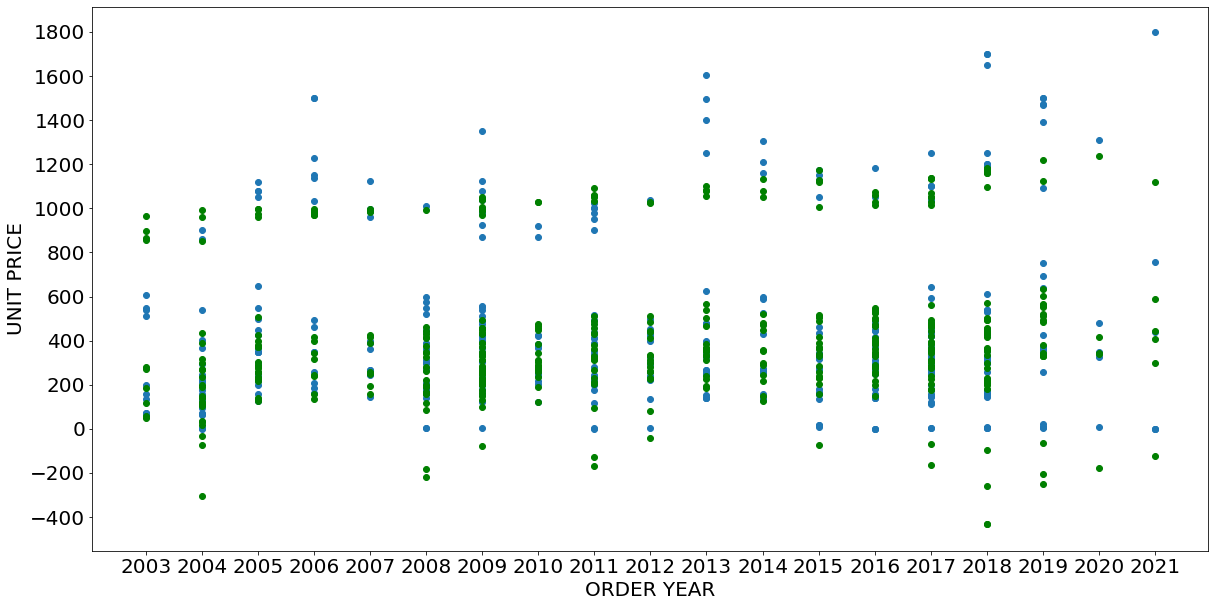

In [398]:
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(20,10))
plt.locator_params(axis="x", nbins=30)
plt.locator_params(axis="y", nbins=20)
plt.scatter(x_test['ACT_ISS_DT_YR'],y_test)
plt.scatter(x_test['ACT_ISS_DT_YR'],y_prediction,color='Green')
plt.ylabel("UNIT PRICE")
plt.xlabel("ORDER YEAR")